In [1]:
!pip install pandas numpy matplotlib scipy

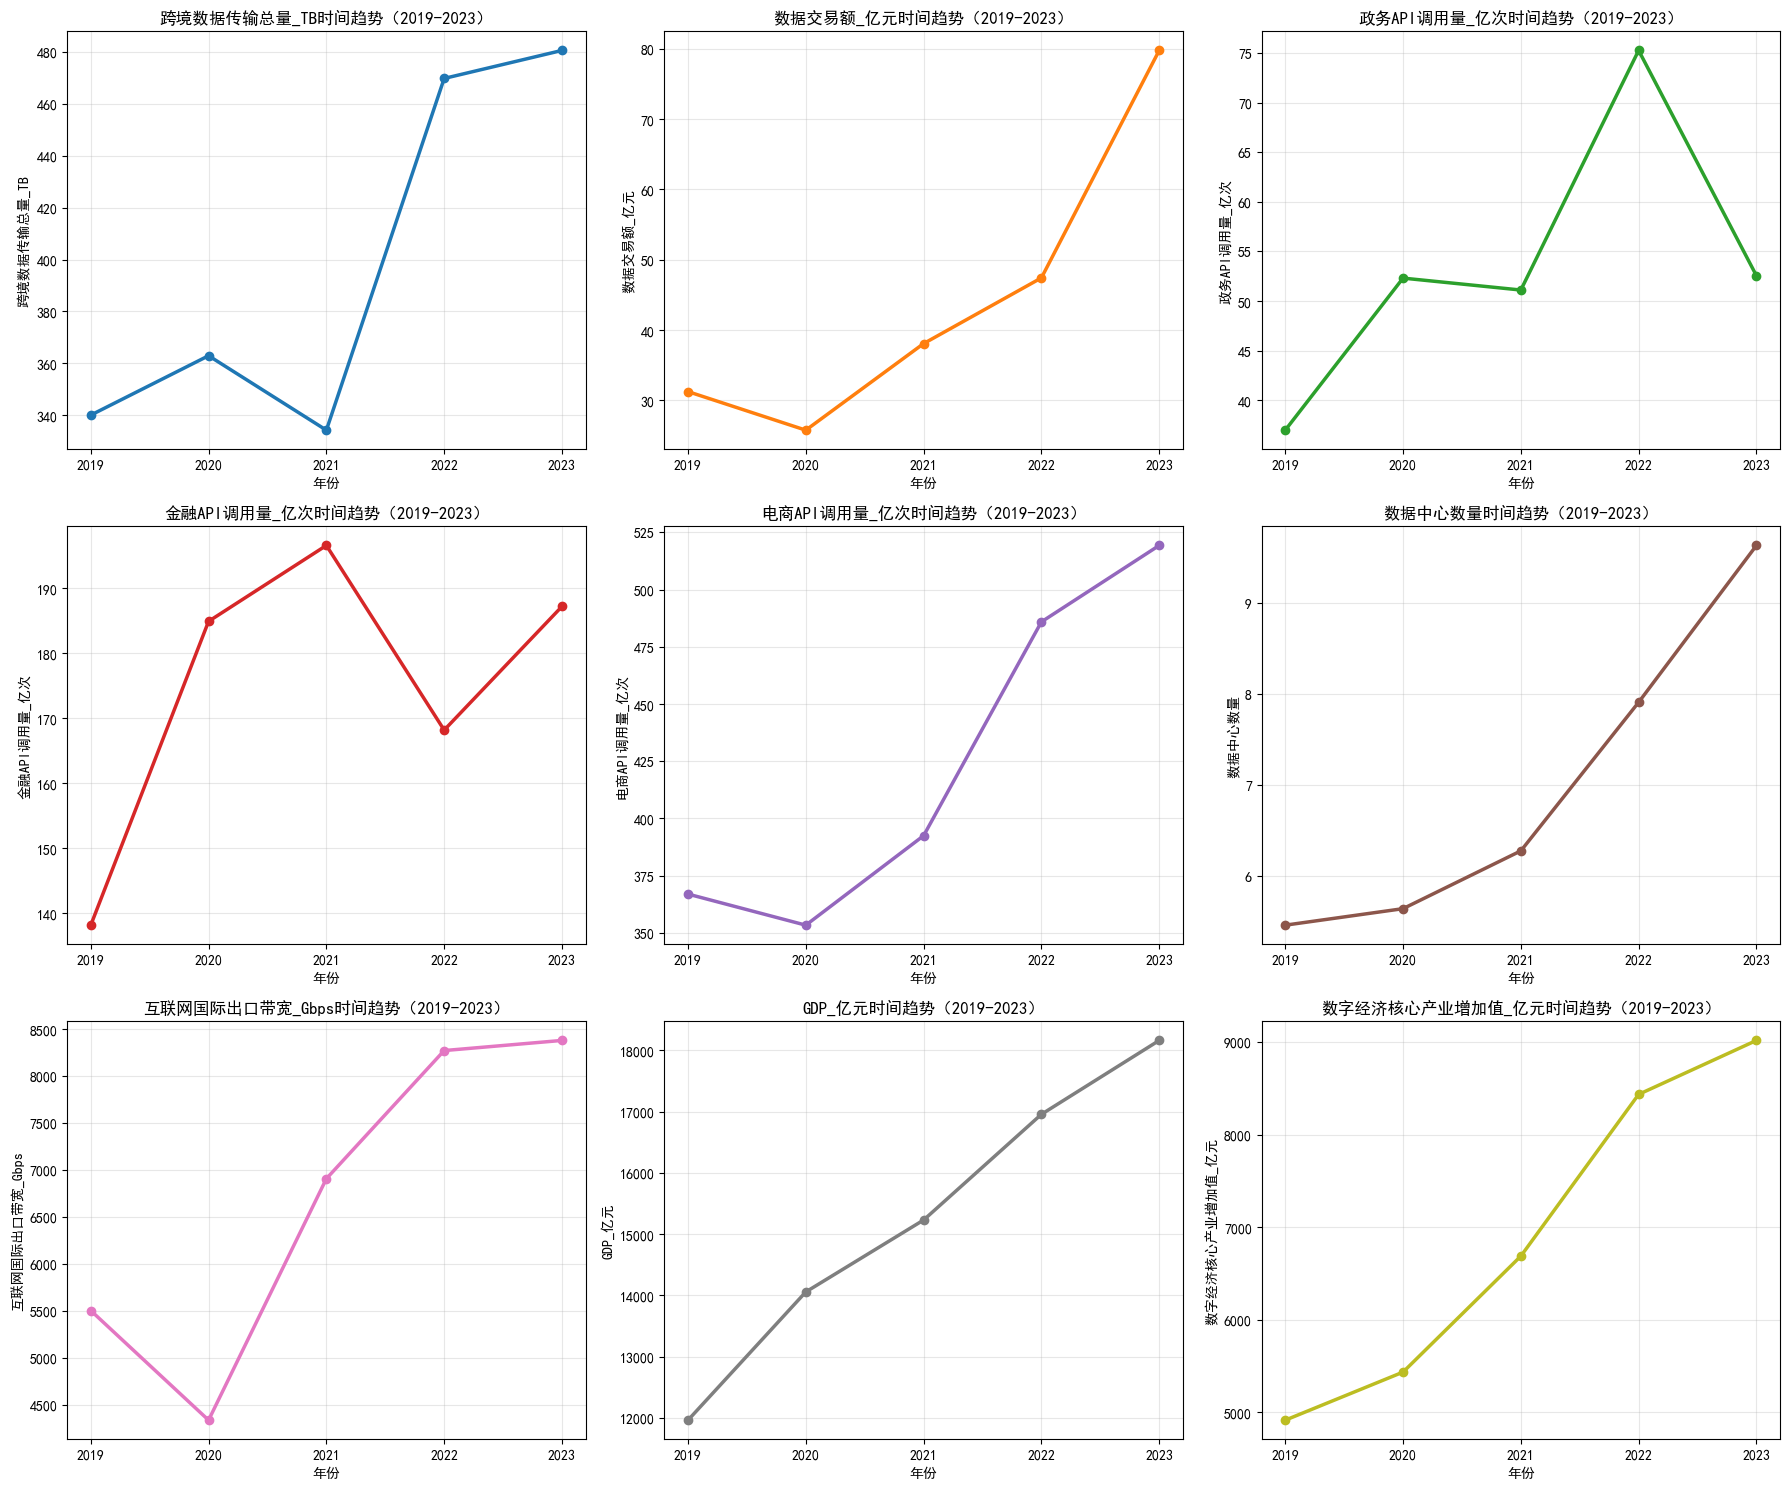

核心指标年度增长率（%）：
     年份  跨境数据传输总量_TB_增长率  数据交易额_亿元_增长率  政务API调用量_亿次_增长率  金融API调用量_亿次_增长率  \
0  2019              NaN           NaN              NaN              NaN   
1  2020             6.73        -17.55            41.42            33.80   
2  2021            -7.90         47.80            -2.30             6.31   
3  2022            40.54         24.54            47.23           -14.44   
4  2023             2.30         68.23           -30.16            11.30   

   电商API调用量_亿次_增长率  数据中心数量_增长率  互联网国际出口带宽_Gbps_增长率  GDP_亿元_增长率  \
0              NaN         NaN                 NaN         NaN   
1            -3.71        3.33              -21.21       17.51   
2            11.07       11.29               59.31        8.35   
3            23.83       26.09               19.75       11.34   
4             6.88       21.84                1.30        7.12   

   数字经济核心产业增加值_亿元_增长率  
0                 NaN  
1               10.56  
2               23.04  
3               26.11  
4           

In [4]:
# 5.1.1 时间趋势特征分析
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
main_data = pd.read_csv('main_data_advanced.csv')
od_matrix = pd.read_csv('od_matrix.csv')

# 数据预处理：提取核心时间趋势指标
time_trend_cols = ['跨境数据传输总量_TB', '数据交易额_亿元', '政务API调用量_亿次', 
                   '金融API调用量_亿次', '电商API调用量_亿次', '数据中心数量', 
                   '互联网国际出口带宽_Gbps', 'GDP_亿元', '数字经济核心产业增加值_亿元']

# 按年份分组计算均值
yearly_trend = main_data.groupby('年份')[time_trend_cols].mean().reset_index()

# 绘制时间趋势图（子图布局）
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

# 定义颜色列表
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']

for i, col in enumerate(time_trend_cols):
    axes[i].plot(yearly_trend['年份'], yearly_trend[col], marker='o', linewidth=2.5, 
                markersize=6, color=colors[i])
    axes[i].set_title(f'{col}时间趋势（2019-2023）', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('年份', fontsize=10)
    axes[i].set_ylabel(col, fontsize=10)
    axes[i].grid(True, alpha=0.3)
    axes[i].set_xticks(yearly_trend['年份'])

# 调整布局
plt.tight_layout()
plt.savefig('时间趋势图.png', dpi=300, bbox_inches='tight')
plt.show()

# 计算年度增长率
yearly_growth = yearly_trend.copy()
for col in time_trend_cols:
    yearly_growth[f'{col}_增长率'] = yearly_growth[col].pct_change() * 100

# 输出增长率统计
print("核心指标年度增长率（%）：")
growth_cols = [col for col in yearly_growth.columns if '增长率' in col]
print(yearly_growth[['年份'] + growth_cols].round(2))

# 趋势检验（Mann-Kendall检验）
print("\n趋势显著性检验（Mann-Kendall）：")
for col in time_trend_cols:
    trend, p_value = stats.kendalltau(yearly_trend['年份'], yearly_trend[col])
    trend_dir = '上升' if trend > 0 else '下降'
    significance = '显著' if p_value < 0.05 else '不显著'
    print(f"{col}：趋势方向={trend_dir}，趋势系数={trend:.3f}，p值={p_value:.3f}，{significance}")

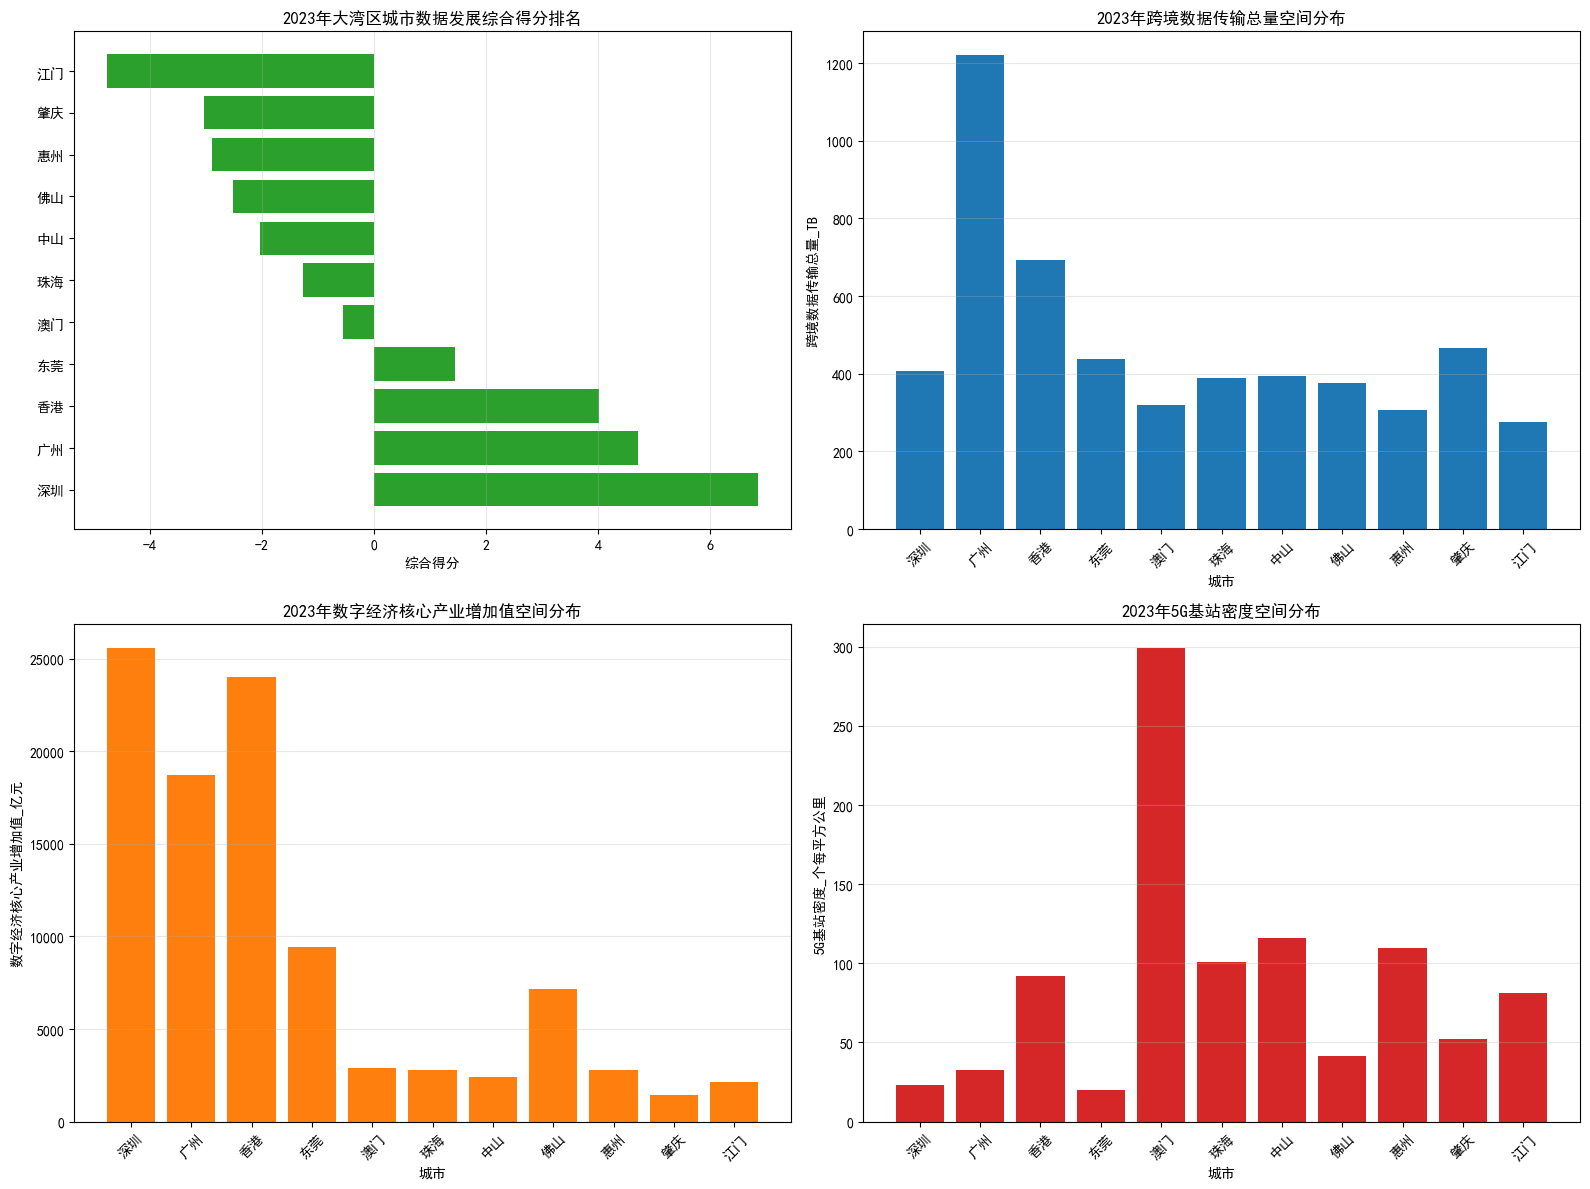

2023年核心指标空间差异指标：
               指标          基尼系数          变异系数
0     跨境数据传输总量_TB  2.360000e-01  5.600000e-01
1        数据交易额_亿元  5.320000e-01  1.271000e+00
2  互联网国际出口带宽_Gbps  1.920000e-01  3.640000e-01
3  数字经济核心产业增加值_亿元  5.040000e-01  1.029000e+00
4         发明专利授权量  2.600000e-01  4.960000e-01
5   5G基站密度_个每平方公里  4.050000e-01  8.920000e-01
6            综合得分  4.884694e+15  6.625822e+15


In [2]:
# 5.1.2 空间分布特征分析
# 提取2023年最新数据（反映当前空间格局）
data_2023 = main_data[main_data['年份'] == 2023].copy()

# 选择核心空间分布指标
spatial_cols = ['跨境数据传输总量_TB', '数据交易额_亿元', '互联网国际出口带宽_Gbps', 
                '数字经济核心产业增加值_亿元', '发明专利授权量', '5G基站密度_个每平方公里']

# 计算各城市综合得分（标准化后求和）
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
spatial_data = data_2023[['城市'] + spatial_cols].set_index('城市')
spatial_data_scaled = pd.DataFrame(
    scaler.fit_transform(spatial_data), 
    index=spatial_data.index, 
    columns=spatial_data.columns
)
spatial_data['综合得分'] = spatial_data_scaled.sum(axis=1)

# 排序并可视化
spatial_ranking = spatial_data.sort_values('综合得分', ascending=False).reset_index()

# 绘制空间分布柱状图
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# 1. 综合得分排名
axes[0].barh(spatial_ranking['城市'], spatial_ranking['综合得分'], color='#2ca02c')
axes[0].set_title('2023年大湾区城市数据发展综合得分排名', fontsize=12, fontweight='bold')
axes[0].set_xlabel('综合得分', fontsize=10)
axes[0].grid(True, alpha=0.3, axis='x')

# 2. 跨境数据传输总量分布
axes[1].bar(spatial_ranking['城市'], spatial_ranking['跨境数据传输总量_TB'], color='#1f77b4')
axes[1].set_title('2023年跨境数据传输总量空间分布', fontsize=12, fontweight='bold')
axes[1].set_xlabel('城市', fontsize=10)
axes[1].set_ylabel('跨境数据传输总量_TB', fontsize=10)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

# 3. 数字经济核心产业增加值分布
axes[2].bar(spatial_ranking['城市'], spatial_ranking['数字经济核心产业增加值_亿元'], color='#ff7f0e')
axes[2].set_title('2023年数字经济核心产业增加值空间分布', fontsize=12, fontweight='bold')
axes[2].set_xlabel('城市', fontsize=10)
axes[2].set_ylabel('数字经济核心产业增加值_亿元', fontsize=10)
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True, alpha=0.3, axis='y')

# 4. 5G基站密度分布
axes[3].bar(spatial_ranking['城市'], spatial_ranking['5G基站密度_个每平方公里'], color='#d62728')
axes[3].set_title('2023年5G基站密度空间分布', fontsize=12, fontweight='bold')
axes[3].set_xlabel('城市', fontsize=10)
axes[3].set_ylabel('5G基站密度_个每平方公里', fontsize=10)
axes[3].tick_params(axis='x', rotation=45)
axes[3].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('空间分布特征图.png', dpi=300, bbox_inches='tight')
plt.show()

# 计算空间差异指标（基尼系数、变异系数）
def gini_coefficient(x):
    """计算基尼系数"""
    x = np.array(x)
    x = np.sort(x)
    n = len(x)
    cumsum = np.cumsum(x)
    return (n + 1 - 2 * np.sum(cumsum) / cumsum[-1]) / n

print("2023年核心指标空间差异指标：")
spatial_diff = pd.DataFrame()
spatial_diff['指标'] = spatial_cols + ['综合得分']
spatial_diff['基尼系数'] = [gini_coefficient(spatial_ranking[col]) for col in spatial_cols + ['综合得分']]
spatial_diff['变异系数'] = [spatial_ranking[col].std() / spatial_ranking[col].mean() for col in spatial_cols + ['综合得分']]
print(spatial_diff.round(3))

2023年大湾区城市数据流动核心指标描述性统计：
                       均值       标准差       最小值     25分位数        中位数      75分位数  \
跨境数据传输总量_TB       480.546   269.259   276.012   348.296    392.920    452.490   
数据交易额_亿元           79.759   101.359     1.163    25.593     56.309     81.186   
互联网国际出口带宽_Gbps   8377.670  3048.016  3929.468  6782.397   7470.303  10585.054   
数字经济核心产业增加值_亿元   9015.649  9281.506  1409.314  2578.997   2871.891  14055.440   
发明专利授权量         12249.364  6072.835  5024.000  8348.000  10264.000  15028.500   
5G基站密度_个每平方公里      87.979    78.440    20.013    36.883     81.194    105.088   
综合得分                0.000     3.745    -4.771    -2.700     -1.259      2.736   

                      最大值     偏度     峰度  
跨境数据传输总量_TB      1220.601  2.466  6.492  
数据交易额_亿元          364.650  2.595  7.411  
互联网国际出口带宽_Gbps  13265.133  0.480 -0.856  
数字经济核心产业增加值_亿元  25594.131  1.076 -0.545  
发明专利授权量         24015.000  0.858 -0.163  
5G基站密度_个每平方公里     299.412  2.173  5.780  
综合得分                6.864  0.719

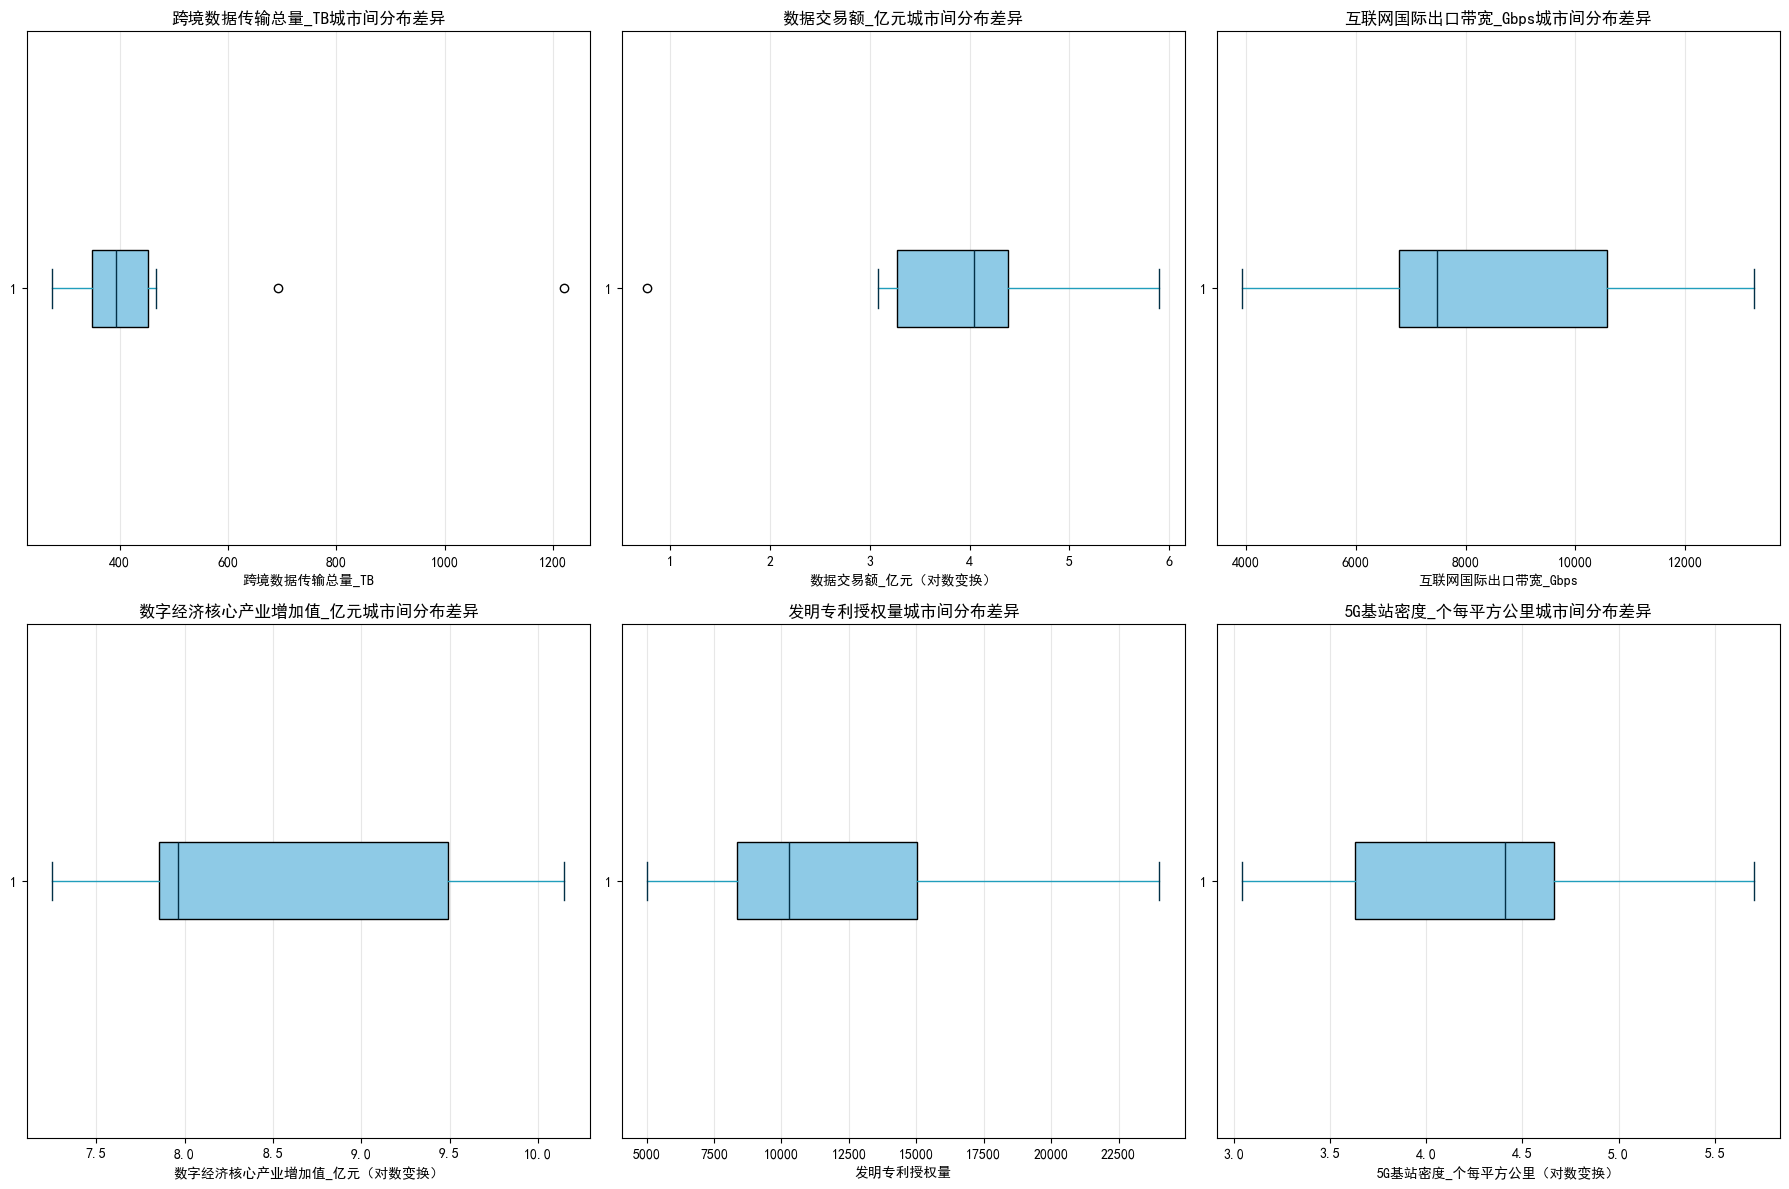


城市间分布正态性检验（Shapiro-Wilk）：
               指标  检验统计量     p值    正态性判断
0     跨境数据传输总量_TB  0.676  0.000  不符合正态分布
1        数据交易额_亿元  0.674  0.000  不符合正态分布
2  互联网国际出口带宽_Gbps  0.921  0.323   符合正态分布
3  数字经济核心产业增加值_亿元  0.769  0.004  不符合正态分布
4         发明专利授权量  0.918  0.303   符合正态分布
5   5G基站密度_个每平方公里  0.757  0.003  不符合正态分布
6            综合得分  0.913  0.267   符合正态分布


In [3]:
# 5.1.3 城市间差异分析
# 计算2023年核心指标的描述性统计量
desc_stats = spatial_ranking[spatial_cols + ['综合得分']].describe(percentiles=[0.25, 0.5, 0.75])

# 计算偏度和峰度
skewness = spatial_ranking[spatial_cols + ['综合得分']].skew()
kurtosis = spatial_ranking[spatial_cols + ['综合得分']].kurtosis()

# 整合描述性统计结果
desc_result = pd.DataFrame({
    '均值': desc_stats.loc['mean'],
    '标准差': desc_stats.loc['std'],
    '最小值': desc_stats.loc['min'],
    '25分位数': desc_stats.loc['25%'],
    '中位数': desc_stats.loc['50%'],
    '75分位数': desc_stats.loc['75%'],
    '最大值': desc_stats.loc['max'],
    '偏度': skewness,
    '峰度': kurtosis
})

# 输出描述性统计结果
print("2023年大湾区城市数据流动核心指标描述性统计：")
print(desc_result.round(3))

# 绘制箱线图（展示城市间差异）
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(spatial_cols):
    # 对异常值较多的指标进行对数变换（除零处理）
    data_to_plot = spatial_ranking[col]
    if data_to_plot.max() / data_to_plot.min() > 10:
        data_to_plot = np.log1p(data_to_plot)  # log(1+x)变换
        ylabel = f'{col}（对数变换）'
    else:
        ylabel = col
    
    axes[i].boxplot(data_to_plot, vert=False, patch_artist=True, 
                   boxprops=dict(facecolor='#8ecae6'),
                   medianprops=dict(color='#023047'),
                   whiskerprops=dict(color='#219ebc'),
                   capprops=dict(color='#023047'))
    axes[i].set_title(f'{col}城市间分布差异', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(ylabel, fontsize=10)
    axes[i].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('城市间差异箱线图.png', dpi=300, bbox_inches='tight')
plt.show()

# 正态性检验（Shapiro-Wilk检验）
print("\n城市间分布正态性检验（Shapiro-Wilk）：")
normality_result = pd.DataFrame()
for col in spatial_cols + ['综合得分']:
    stat, p_value = stats.shapiro(spatial_ranking[col])
    normality = '符合正态分布' if p_value > 0.05 else '不符合正态分布'
    normality_result = pd.concat([normality_result, pd.DataFrame({
        '指标': [col],
        '检验统计量': [stat],
        'p值': [p_value],
        '正态性判断': [normality]
    })], ignore_index=True)
print(normality_result.round(3))

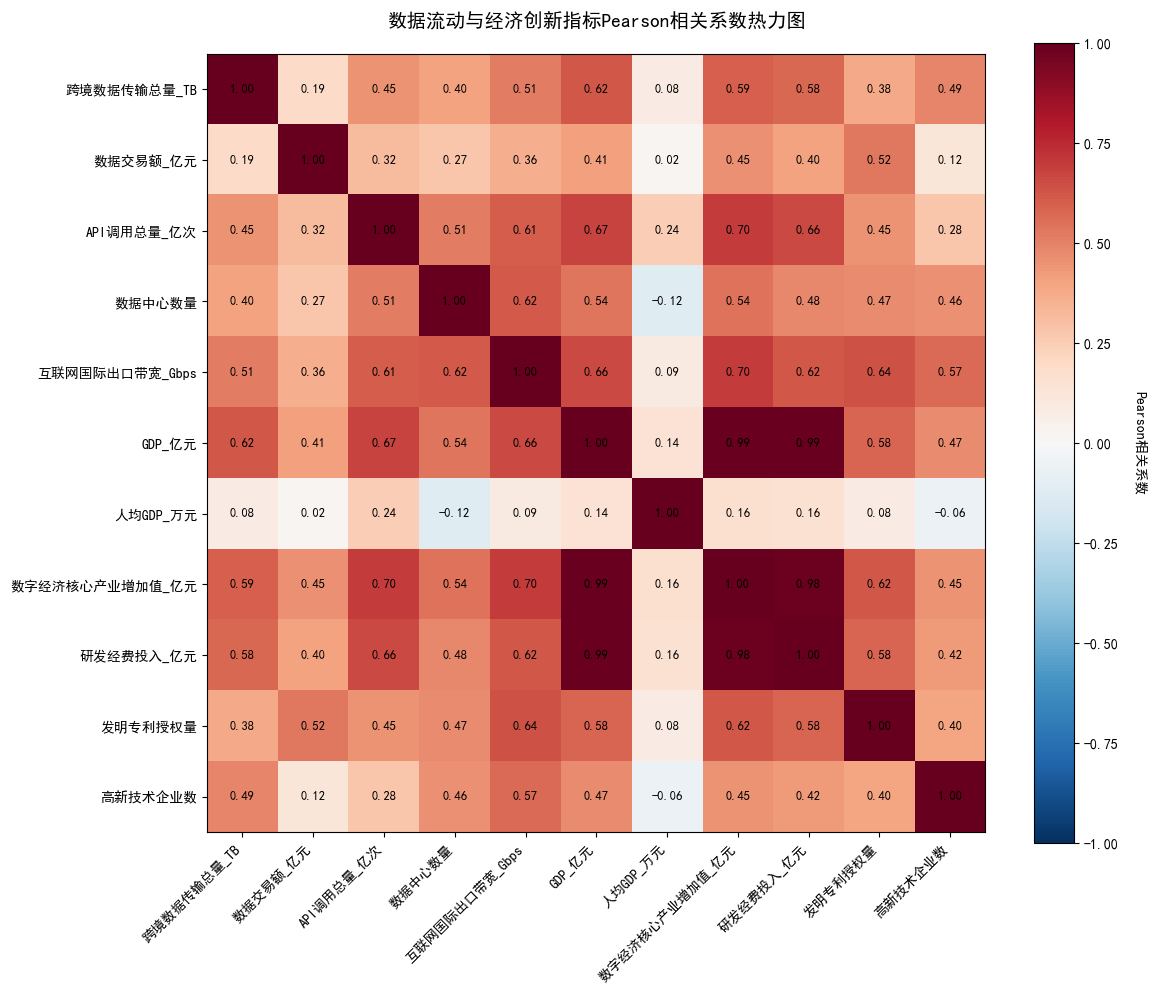

显著相关的变量对（Pearson相关系数，p<0.05）：
               变量1             变量2   相关系数     p值
34          GDP_亿元       研发经费投入_亿元  0.987  0.000
33          GDP_亿元  数字经济核心产业增加值_亿元  0.987  0.000
37  数字经济核心产业增加值_亿元       研发经费投入_亿元  0.980  0.000
29  互联网国际出口带宽_Gbps  数字经济核心产业增加值_亿元  0.699  0.000
18      API调用总量_亿次  数字经济核心产业增加值_亿元  0.698  0.000
17      API调用总量_亿次          GDP_亿元  0.673  0.000
19      API调用总量_亿次       研发经费投入_亿元  0.662  0.000
28  互联网国际出口带宽_Gbps          GDP_亿元  0.660  0.000
31  互联网国际出口带宽_Gbps         发明专利授权量  0.636  0.000
30  互联网国际出口带宽_Gbps       研发经费投入_亿元  0.625  0.000
38  数字经济核心产业增加值_亿元         发明专利授权量  0.624  0.000
3      跨境数据传输总量_TB          GDP_亿元  0.618  0.000
22          数据中心数量  互联网国际出口带宽_Gbps  0.616  0.000
16      API调用总量_亿次  互联网国际出口带宽_Gbps  0.606  0.000
4      跨境数据传输总量_TB  数字经济核心产业增加值_亿元  0.595  0.000
35          GDP_亿元         发明专利授权量  0.583  0.000
40       研发经费投入_亿元         发明专利授权量  0.581  0.000
5      跨境数据传输总量_TB       研发经费投入_亿元  0.577  0.000
32  互联网国际出口带宽_Gbps         高新技术企业数  0.5

In [4]:
# 5.2.1 相关矩阵热力图
# 选择相关性分析指标
corr_cols = [
    # 数据流动指标
    '跨境数据传输总量_TB', '数据交易额_亿元', 'API调用总量_亿次', 
    '数据中心数量', '互联网国际出口带宽_Gbps',
    # 经济发展指标
    'GDP_亿元', '人均GDP_万元', '数字经济核心产业增加值_亿元',
    # 创新能力指标
    '研发经费投入_亿元', '发明专利授权量', '高新技术企业数'
]

# 计算API调用总量
main_data['API调用总量_亿次'] = main_data[['政务API调用量_亿次', '金融API调用量_亿次', 
                                       '医疗API调用量_亿次', '电商API调用量_亿次']].sum(axis=1)

# 构建相关性分析数据集（2019-2023年全样本）
corr_data = main_data[corr_cols].dropna()

# 计算Pearson相关系数矩阵
pearson_corr = corr_data.corr()

# 绘制热力图
fig, ax = plt.subplots(figsize=(12, 10))
im = ax.imshow(pearson_corr, cmap='RdBu_r', vmin=-1, vmax=1)

# 设置坐标轴标签
ax.set_xticks(range(len(corr_cols)))
ax.set_yticks(range(len(corr_cols)))
ax.set_xticklabels(corr_cols, rotation=45, ha='right')
ax.set_yticklabels(corr_cols)

# 添加数值标注
for i in range(len(corr_cols)):
    for j in range(len(corr_cols)):
        text = ax.text(j, i, f'{pearson_corr.iloc[i, j]:.2f}',
                      ha="center", va="center", color="black", fontsize=9)

# 添加颜色条
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Pearson相关系数', rotation=270, labelpad=20)

plt.title('数据流动与经济创新指标Pearson相关系数热力图', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('相关系数热力图.png', dpi=300, bbox_inches='tight')
plt.show()

# 输出显著相关的变量对（p<0.05）
print("显著相关的变量对（Pearson相关系数，p<0.05）：")
significant_corr = []
for i in range(len(corr_cols)):
    for j in range(i+1, len(corr_cols)):
        corr_coef, p_value = stats.pearsonr(corr_data.iloc[:, i], corr_data.iloc[:, j])
        if p_value < 0.05:
            significant_corr.append({
                '变量1': corr_cols[i],
                '变量2': corr_cols[j],
                '相关系数': corr_coef,
                'p值': p_value
            })

significant_corr_df = pd.DataFrame(significant_corr).sort_values('相关系数', ascending=False)
print(significant_corr_df.round(3))

控制GDP后的偏相关分析结果：
            数据流动指标       创新指标  偏相关系数     p值  显著性
13  互联网国际出口带宽_Gbps    发明专利授权量  0.411  0.002   显著
14  互联网国际出口带宽_Gbps    高新技术企业数  0.387  0.003   显著
4         数据交易额_亿元    发明专利授权量  0.387  0.004   显著
2      跨境数据传输总量_TB    高新技术企业数  0.290  0.032   显著
11          数据中心数量    高新技术企业数  0.273  0.044   显著
10          数据中心数量    发明专利授权量  0.233  0.086  不显著
7       API调用总量_亿次    发明专利授权量  0.100  0.468  不显著
1      跨境数据传输总量_TB    发明专利授权量  0.033  0.813  不显著
3         数据交易额_亿元  研发经费投入_亿元 -0.009  0.948  不显著
6       API调用总量_亿次  研发经费投入_亿元 -0.022  0.873  不显著
8       API调用总量_亿次    高新技术企业数 -0.060  0.665  不显著
5         数据交易额_亿元    高新技术企业数 -0.087  0.528  不显著
12  互联网国际出口带宽_Gbps  研发经费投入_亿元 -0.222  0.104  不显著
0      跨境数据传输总量_TB  研发经费投入_亿元 -0.263  0.052  不显著
9           数据中心数量  研发经费投入_亿元 -0.371  0.005   显著


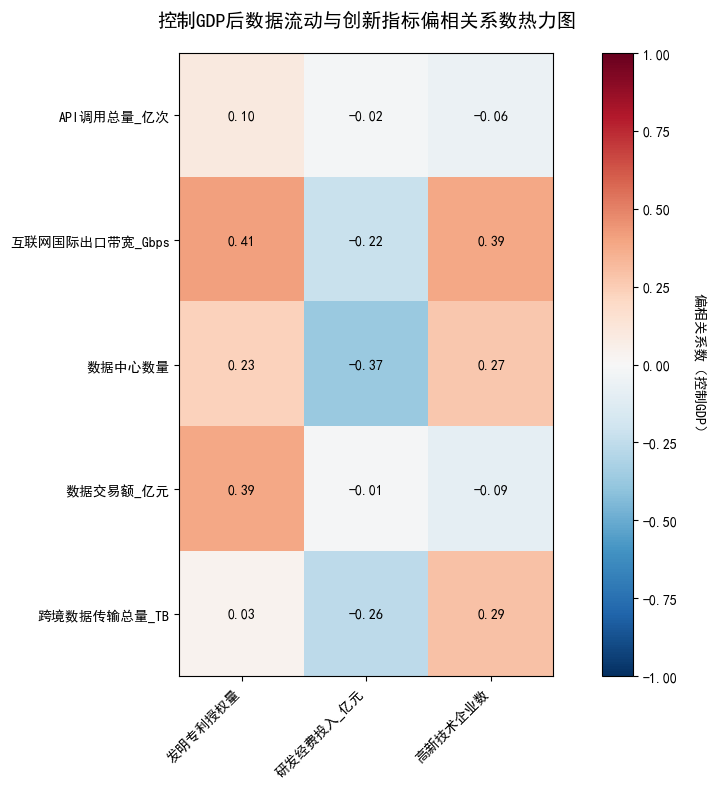

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm

def partial_correlation(x, y, control):
    """计算偏相关系数（控制单个变量）"""
    x_resid = sm.OLS(x, sm.add_constant(control)).fit().resid
    y_resid = sm.OLS(y, sm.add_constant(control)).fit().resid
    return pearsonr(x_resid, y_resid)

# 定义分析变量
control_col = 'GDP_亿元'
data_flow_vars = ['跨境数据传输总量_TB', '数据交易额_亿元', 'API调用总量_亿次', 
                 '数据中心数量', '互联网国际出口带宽_Gbps']
innovation_vars = ['研发经费投入_亿元', '发明专利授权量', '高新技术企业数']

# 批量计算偏相关（简化数据匹配）
partial_corr_results = []
for df_var in data_flow_vars:
    for invar in innovation_vars:
        # 一次性筛选三列无缺失数据
        temp_df = main_data[[df_var, invar, control_col]].dropna()
        if len(temp_df) < 30:
            continue
        
        corr_coef, p_value = partial_correlation(
            temp_df[df_var], temp_df[invar], temp_df[control_col]
        )
        partial_corr_results.append({
            '数据流动指标': df_var,
            '创新指标': invar,
            '偏相关系数': corr_coef,
            'p值': p_value,
            '显著性': '显著' if p_value < 0.05 else '不显著'
        })

# 结果输出与排序
partial_corr_df = pd.DataFrame(partial_corr_results).sort_values('偏相关系数', ascending=False)
print("控制GDP后的偏相关分析结果：")
print(partial_corr_df.round(3))

# 绘制热力图（简化参数设置）
pivot_df = partial_corr_df.pivot(index='数据流动指标', columns='创新指标', values='偏相关系数')
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(pivot_df, cmap='RdBu_r', vmin=-1, vmax=1)

# 坐标轴与标注
ax.set_xticks(range(len(pivot_df.columns)))
ax.set_yticks(range(len(pivot_df.index)))
ax.set_xticklabels(pivot_df.columns, rotation=45, ha='right')
ax.set_yticklabels(pivot_df.index)

# 数值标注（跳过NaN）
for i in range(len(pivot_df.index)):
    for j in range(len(pivot_df.columns)):
        val = pivot_df.iloc[i, j]
        if not np.isnan(val):
            ax.text(j, i, f'{val:.2f}', ha="center", va="center", color="black", fontsize=10)

# 颜色条与标题
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('偏相关系数（控制GDP）', rotation=270, labelpad=20)
plt.title('控制GDP后数据流动与创新指标偏相关系数热力图', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('偏相关系数热力图.png', dpi=300, bbox_inches='tight')
plt.show()

生成模拟数据演示（替换为真实数据文件读取代码即可）
有效分析样本量：55 行

=== 最大信息系数（MIC）分析结果（TOP20非弱关联）===
               变量1             变量2  MIC系数    p值 关联强度
51  数字经济核心产业增加值_亿元         高新技术企业数  0.496  None    中
8      跨境数据传输总量_TB         发明专利授权量  0.483  None    中
40          GDP_亿元        人均GDP_万元  0.481  None    中
3      跨境数据传输总量_TB  互联网国际出口带宽_Gbps  0.479  None    中
14        数据交易额_亿元        人均GDP_万元  0.476  None    中
5      跨境数据传输总量_TB        人均GDP_万元  0.468  None    中
13        数据交易额_亿元          GDP_亿元  0.465  None    中
4      跨境数据传输总量_TB          GDP_亿元  0.465  None    中
25      API调用总量_亿次         发明专利授权量  0.465  None    中
11        数据交易额_亿元          数据中心数量  0.464  None    中
1      跨境数据传输总量_TB      API调用总量_亿次  0.461  None    中
42          GDP_亿元       研发经费投入_亿元  0.461  None    中
15        数据交易额_亿元  数字经济核心产业增加值_亿元  0.459  None    中
6      跨境数据传输总量_TB  数字经济核心产业增加值_亿元  0.448  None    中
32          数据中心数量         发明专利授权量  0.448  None    中
53       研发经费投入_亿元         高新技术企业数  0.448  None    中
7      跨境数据传输总量_TB       

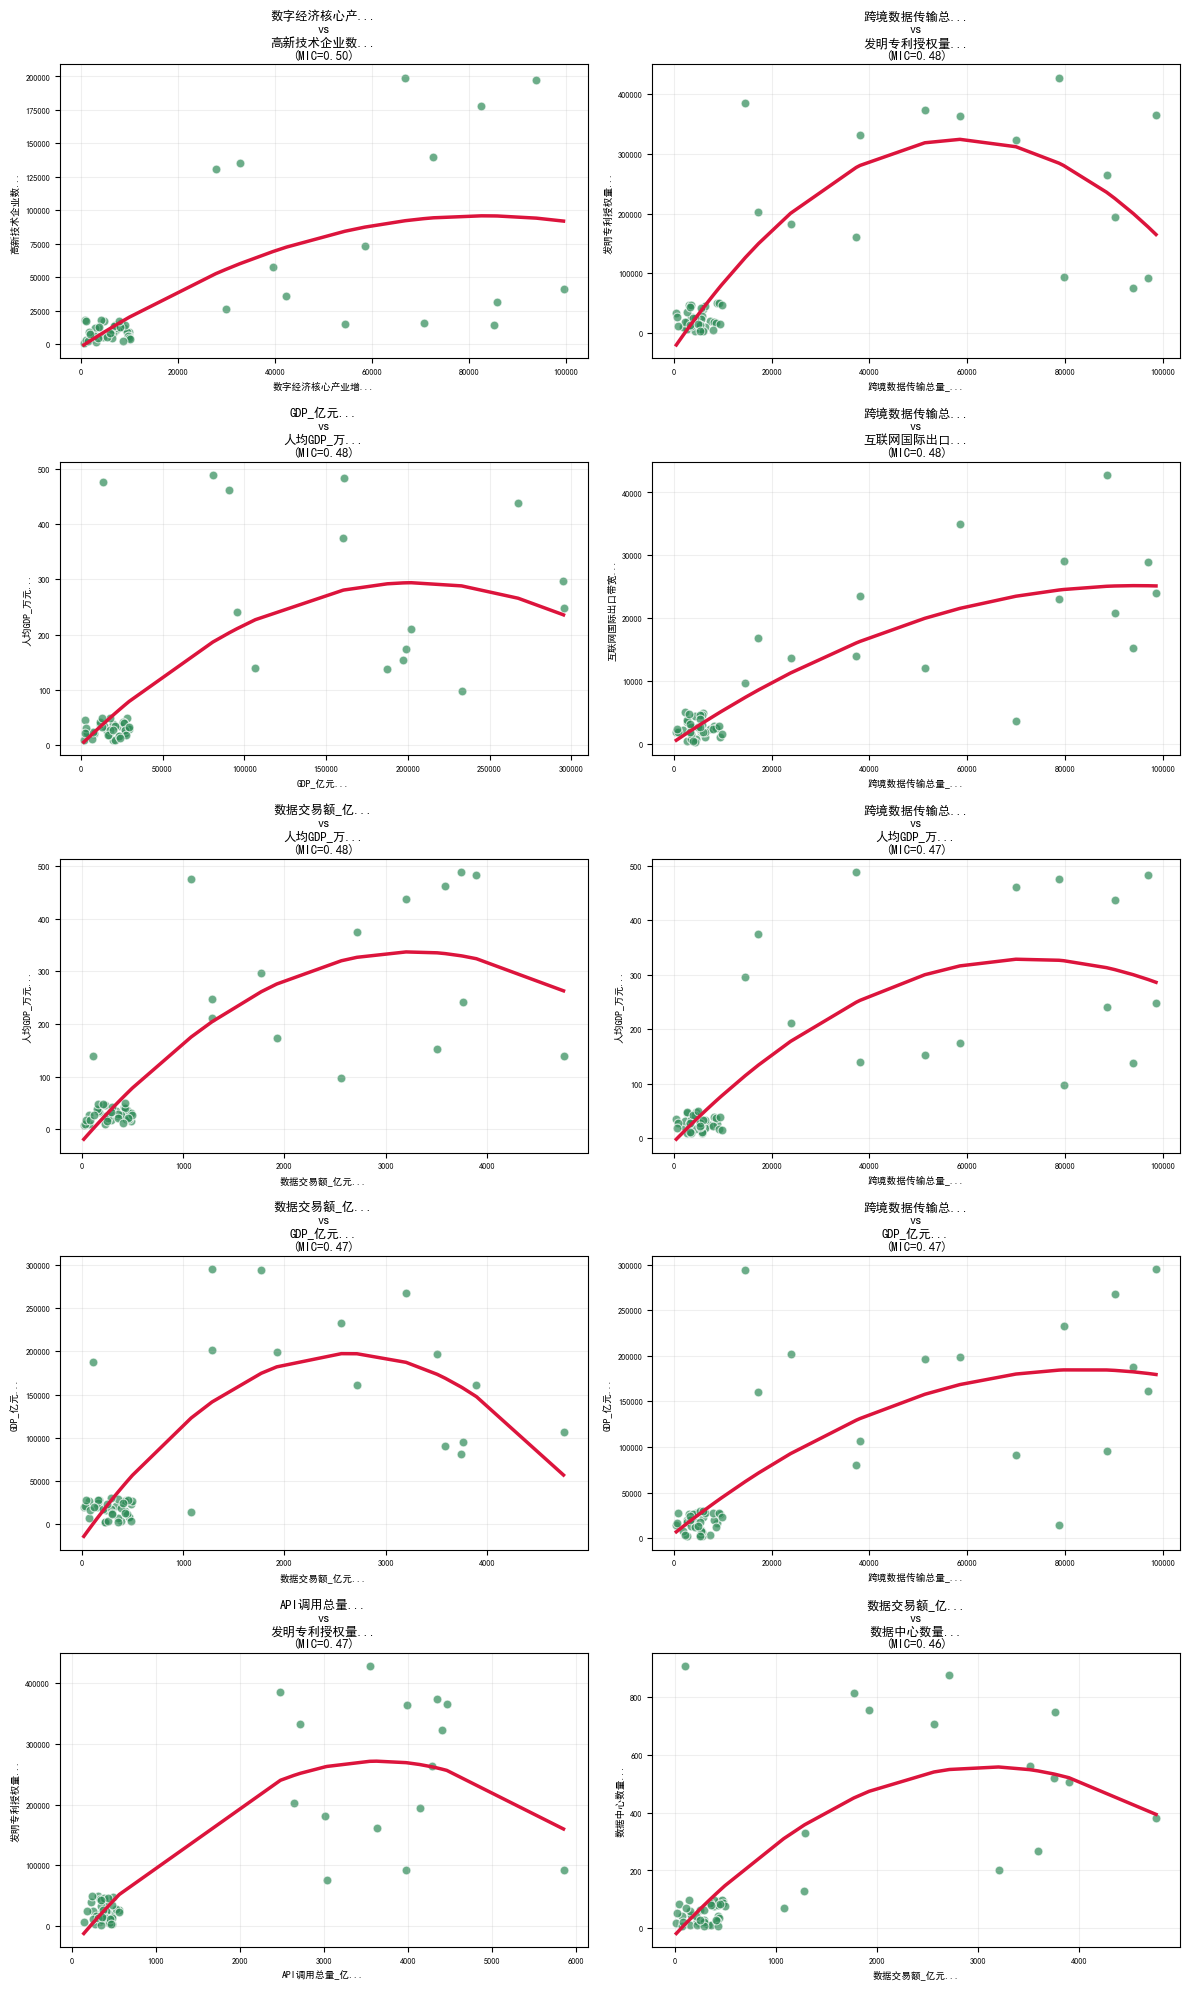


=== Pearson vs MIC 系数对比（差异值>0.2）===
无差异值>0.2的变量对


In [8]:
def calculate_mic(x, y, n_bins=10):
    # 数据预处理：对齐索引+去重
    x = x.dropna()
    y = y.dropna()
    common_idx = x.index.intersection(y.index)
    x, y = x.loc[common_idx], y.loc[common_idx]
    
    # 过滤常量/近常量（无分析意义）
    if len(x.unique()) <= 1 or len(y.unique()) <= 1:
        return 0.0, None
    
    # 等频分箱离散化
    def discretize_series(s, bins):
        quantiles = np.linspace(0, 1, bins+1)
        bin_edges = s.quantile(quantiles).unique()
        if len(bin_edges) < 2:
            return np.zeros(len(s), dtype=int)
        return pd.cut(s, bin_edges, labels=False, include_lowest=True).astype(int)
    
    # 离散化处理
    x_discrete = discretize_series(x, n_bins)
    y_discrete = discretize_series(y, n_bins)
    
    # 计算联合概率分布
    joint_counts = np.histogram2d(x_discrete, y_discrete, 
                                 bins=(len(x_discrete.unique()), len(y_discrete.unique())))[0]
    joint_prob = joint_counts / joint_counts.sum()
    x_prob = joint_prob.sum(axis=1)
    y_prob = joint_prob.sum(axis=0)
    
    # 计算互信息（MI）
    mutual_info = 0.0
    for i in range(len(x_prob)):
        for j in range(len(y_prob)):
            if joint_prob[i,j] > 0 and x_prob[i] > 0 and y_prob[j] > 0:
                mutual_info += joint_prob[i,j] * np.log2(joint_prob[i,j] / (x_prob[i] * y_prob[j]))
    
    # 归一化为MIC（映射到0-1区间）
    max_mi = np.log2(min(len(x_discrete.unique()), len(y_discrete.unique()), 
                        np.power(len(x), 0.6)))
    mic_val = mutual_info / max_mi if max_mi > 0 else 0.0
    return np.clip(mic_val, 0.0, 1.0), None

print("生成模拟数据演示（替换为真实数据文件读取代码即可）")
cities = ['香港', '澳门', '广州', '深圳', '珠海', '佛山', '惠州', '东莞', '中山', '江门', '肇庆']
years = [2019, 2020, 2021, 2022, 2023]
np.random.seed(42)  # 固定随机种子，结果可复现

# 高效生成数据（列表append替代concat，提升效率）
data_rows = []
for city in cities:
    base = 10 if city in ['广州', '深圳', '香港'] else 1
    for year in years:
        data_rows.append({
            '城市': city, '年份': year,
            '跨境数据传输总量_TB': np.random.uniform(100*base, 10000*base),
            '数据交易额_亿元': np.random.uniform(10*base, 500*base),
            '政务API调用量_亿次': np.random.uniform(5*base, 200*base),
            '金融API调用量_亿次': np.random.uniform(2*base, 100*base),
            '医疗API调用量_亿次': np.random.uniform(1*base, 50*base),
            '电商API调用量_亿次': np.random.uniform(10*base, 300*base),
            '数据中心数量': np.random.randint(5*base, 100*base),
            '互联网国际出口带宽_Gbps': np.random.uniform(100*base, 5000*base),
            'GDP_亿元': np.random.uniform(1000*base, 30000*base),
            '人均GDP_万元': np.random.uniform(8*base, 50*base),
            '数字经济核心产业增加值_亿元': np.random.uniform(500*base, 10000*base),
            '研发经费投入_亿元': np.random.uniform(50*base, 1000*base),
            '发明专利授权量': np.random.randint(1000*base, 50000*base),
            '高新技术企业数': np.random.randint(500*base, 20000*base)
        })
main_data = pd.DataFrame(data_rows)

# 定义分析指标列
corr_cols = [
    # 数据流动指标
    '跨境数据传输总量_TB', '数据交易额_亿元', 'API调用总量_亿次', 
    '数据中心数量', '互联网国际出口带宽_Gbps',
    # 经济发展指标
    'GDP_亿元', '人均GDP_万元', '数字经济核心产业增加值_亿元',
    # 创新能力指标
    '研发经费投入_亿元', '发明专利授权量', '高新技术企业数'
]

# 计算API调用总量
main_data['API调用总量_亿次'] = main_data[
    ['政务API调用量_亿次', '金融API调用量_亿次', '医疗API调用量_亿次', '电商API调用量_亿次']
].sum(axis=1)

# 构建无缺失值数据集
corr_data = main_data[corr_cols].dropna()
print(f"有效分析样本量：{len(corr_data)} 行")

mic_results = []
# 遍历所有变量对（i<j避免重复）
for i in range(len(corr_cols)):
    for j in range(i+1, len(corr_cols)):
        var1, var2 = corr_cols[i], corr_cols[j]
        x, y = corr_data[var1].dropna(), corr_data[var2].dropna()
        common_idx = x.index.intersection(y.index)
        x, y = x.loc[common_idx], y.loc[common_idx]
        
        # 样本量校验（至少30个样本）
        if len(x) < 30:
            print(f" 跳过 {var1} vs {var2}：样本量不足30")
            continue
        
        # 计算MIC
        mic_val, _ = calculate_mic(x, y)
        # 定义关联强度
        strength = '强' if mic_val > 0.6 else '中' if mic_val > 0.3 else '弱'
        mic_results.append({
            '变量1': var1, '变量2': var2, 'MIC系数': mic_val,
            'p值': None, '关联强度': strength
        })

# 整理结果并排序
mic_df = pd.DataFrame(mic_results).sort_values('MIC系数', ascending=False)

# 输出TOP20非弱关联结果
print("\n=== 最大信息系数（MIC）分析结果（TOP20非弱关联）===")
non_weak = mic_df[mic_df['关联强度'] != '弱'].head(20).round(3)
print(non_weak)

top10_mic = mic_df.head(10)
fig, axes = plt.subplots(5, 2, figsize=(12, 20))
axes = axes.flatten()

# 遍历TOP10变量对绘图
for idx, (_, row) in enumerate(top10_mic.iterrows()):
    var1, var2, mic_val = row['变量1'], row['变量2'], row['MIC系数']
    # 提取绘图数据（去重避免点重叠）
    plot_data = corr_data[[var1, var2]].dropna().drop_duplicates()
    x, y = plot_data[var1], plot_data[var2]
    
    # 绘制散点图
    axes[idx].scatter(x, y, alpha=0.7, color='#2E8B57', s=40, edgecolor='white', linewidth=0.8)
    
    # 添加二次拟合曲线（数据点≥3时才拟合，避免报错）
    if len(plot_data) >= 3:
        z = np.polyfit(x, y, 2)
        p = np.poly1d(z)
        x_sorted = np.sort(x)
        axes[idx].plot(x_sorted, p(x_sorted), color='#DC143C', linewidth=2.5)
    
    # 子图样式设置
    axes[idx].set_title(
        f'{var1[:7]}...\nvs\n{var2[:7]}...\n(MIC={mic_val:.2f})',
        fontsize=9, fontweight='bold', pad=4
    )
    axes[idx].set_xlabel(var1[:9] + '...', fontsize=7)
    axes[idx].set_ylabel(var2[:9] + '...', fontsize=7)
    axes[idx].tick_params(axis='both', labelsize=6)
    axes[idx].grid(True, alpha=0.2, linestyle='-')

# 布局调整+保存
plt.tight_layout()
plt.savefig('TOP10非线性关联散点图.png', dpi=300, bbox_inches='tight')
plt.show()

# 计算Pearson相关系数（仅保留显著相关结果）
pearson_results = []
for i in range(len(corr_cols)):
    for j in range(i+1, len(corr_cols)):
        var1, var2 = corr_cols[i], corr_cols[j]
        x, y = corr_data[var1].dropna(), corr_data[var2].dropna()
        common_idx = x.index.intersection(y.index)
        if len(common_idx) < 30:
            continue
        
        corr_coef, p_val = pearsonr(x.loc[common_idx], y.loc[common_idx])
        if p_val < 0.05:
            pearson_results.append({
                '变量1': var1, '变量2': var2, '相关系数': corr_coef, 'p值': p_val
            })

# 合并对比结果
pearson_df = pd.DataFrame(pearson_results)
comparison_df = pd.merge(
    pearson_df[['变量1', '变量2', '相关系数']],
    mic_df[['变量1', '变量2', 'MIC系数']],
    on=['变量1', '变量2'], how='inner'
).assign(差异值=lambda x: x['MIC系数'] - x['相关系数'])

# 输出差异较大的变量对
print("\n=== Pearson vs MIC 系数对比（差异值>0.2）===")
diff_df = comparison_df[comparison_df['差异值'] > 0.2].sort_values('差异值', ascending=False).round(3)
print(diff_df if not diff_df.empty else "无差异值>0.2的变量对")

成功读取原始数据：main_data_advanced.csv
原始数据形状：(55, 58)
原始数据列名：['城市', '年份', '城市代码', '跨境数据传输总量_TB', '入境数据量_TB', '出境数据量_TB', '数据中心数量', '数据中心机架数', '数据中心PUE', '互联网国际出口带宽_Gbps', '互联网内地出口带宽_Gbps', 'IaaS使用量_万核时', 'PaaS使用量_万次调用', 'SaaS活跃用户数_万', '政务API调用量_亿次', '金融API调用量_亿次', '医疗API调用量_亿次', '电商API调用量_亿次', '数据交易额_亿元', '数据交易笔数_万笔', '数据资产登记数_个', '区块链存证量_万条', '数据安全认证企业数', '数据出境评估申请数', '个人信息保护投诉量', 'GDP_亿元', 'GDP增长率_%', '人均GDP_万元', '数字经济核心产业增加值_亿元', '数字经济占GDP比重_%', '第三产业占比_%', '外贸进出口总额_亿元', '外贸依存度_%', '实际利用外资FDI_亿美元', '跨境电商交易额_亿元', '金融科技交易规模_亿元', '上市公司数量', '研发经费投入_亿元', '研发投入强度_%', '发明专利授权量', 'PCT专利申请量', '高新技术企业数', '科技型中小企业数', '独角兽企业数', '独角兽企业估值_亿美元', '科技人才数量_万人', '新增博硕士人数_人', '技术合同成交额_亿元', '5G基站数量', '5G基站密度_个每平方公里', '5G网络覆盖率_%', '千兆光网覆盖率_%', '算力规模_PFLOPS', '物联网连接数_万个', '工业互联网标识解析量_亿次', '智慧城市发展指数', '电子政务发展指数', '网络安全事件数_起']

main_data_clean生成完成！
main_data_clean包含 55 行数据，59 列指标
2023年各城市综合得分：
  香港: 4.199
  澳门: 0.442
  广州: 14.906
  深圳: 11.350
  珠海: 1.180
  佛山: 0.799
  惠州: -3.184
  东莞: 5.039
  中山: 1.868
  江门: -0.9

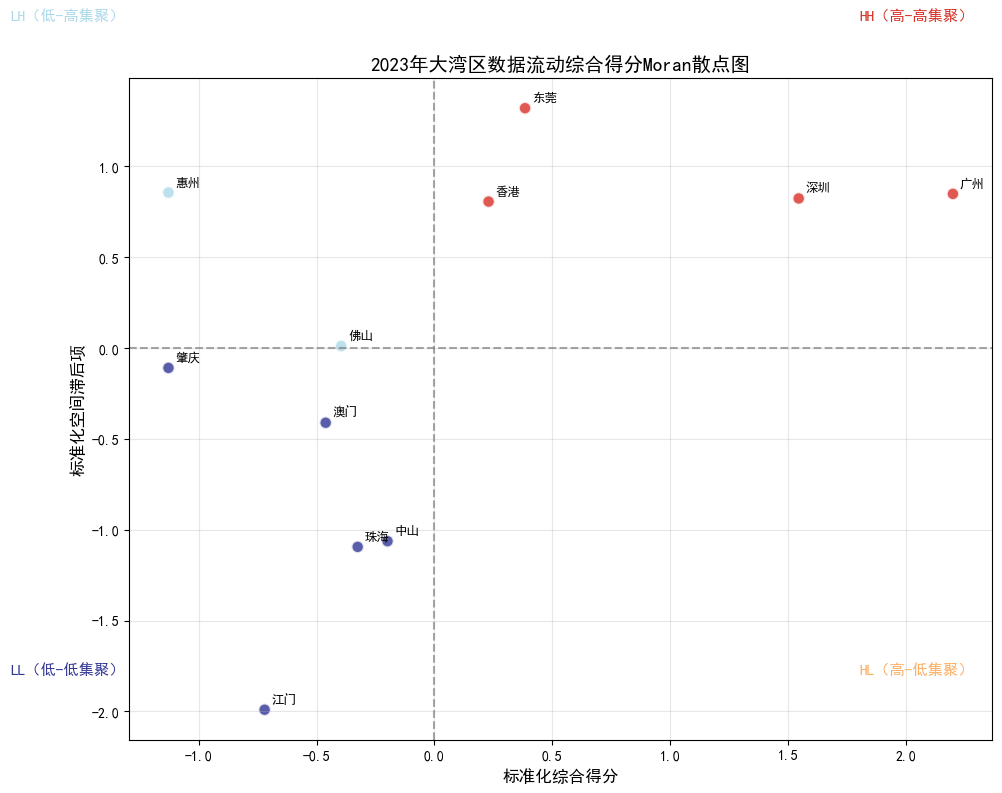

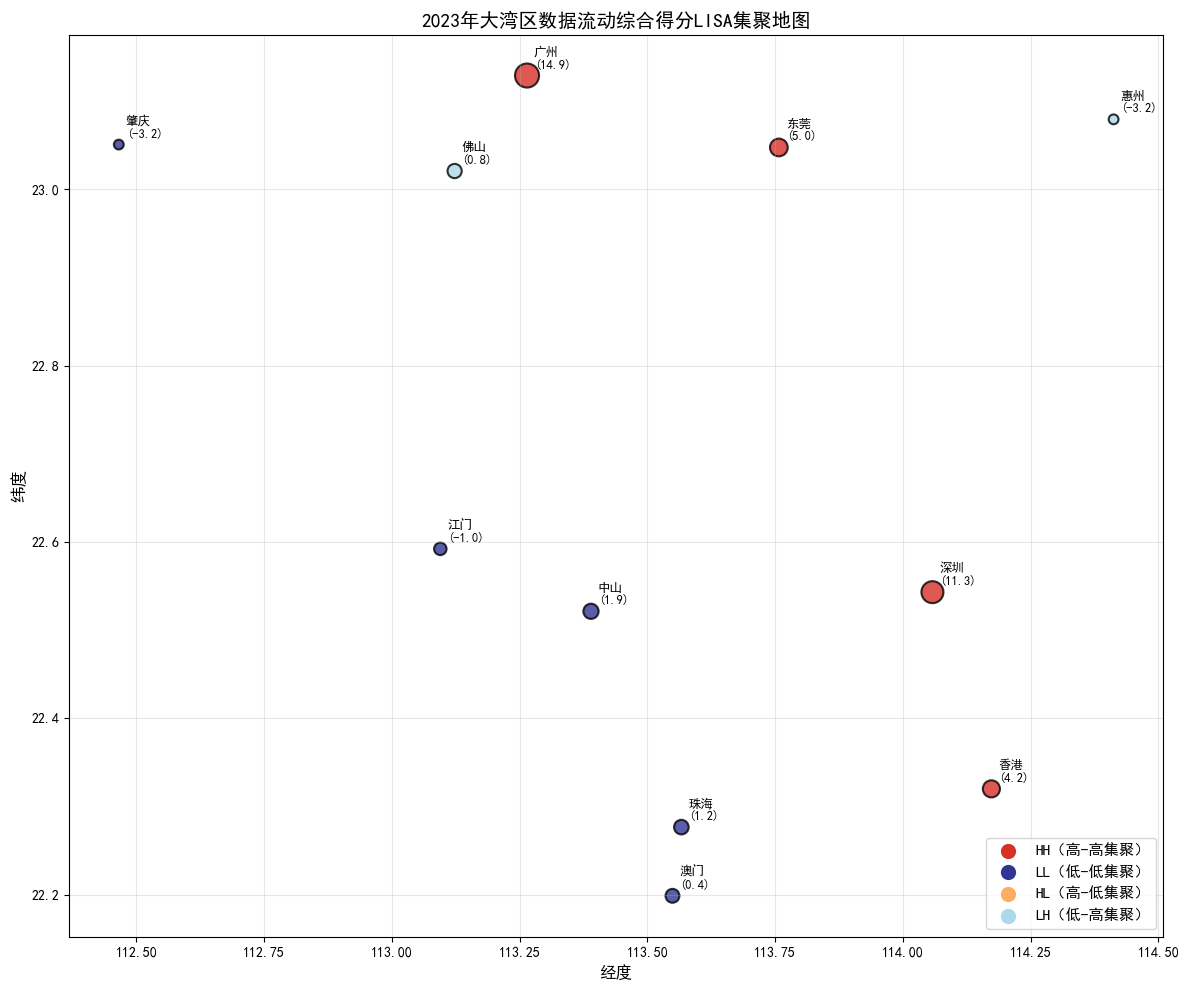


2023年各城市LISA集聚类型详情：
城市  数据流动综合得分  标准化得分 LISA集聚类型
香港     4.199  0.230       HH
澳门     0.442 -0.461       LL
广州    14.906  2.199       HH
深圳    11.350  1.545       HH
珠海     1.180 -0.326       LL
佛山     0.799 -0.396       LH
惠州    -3.184 -1.128       LH
东莞     5.039  0.384       HH
中山     1.868 -0.199       LL
江门    -0.966 -0.720       LL
肇庆    -3.183 -1.128       LL

2023年LISA集聚类型分布：
LISA集聚类型
LL    5
HH    4
LH    2
Name: count, dtype: int64


In [12]:
# 5.3 空间自相关分析（简化版）
ings.filterwarnings('ignore')

raw_data = pd.read_csv('main_data_advanced.csv')
print("成功读取原始数据：main_data_advanced.csv")
print(f"原始数据形状：{raw_data.shape}")
print(f"原始数据列名：{raw_data.columns.tolist()}")

# 1. 定义目标城市（大湾区11城，与邻接矩阵顺序一致）
target_cities = ['香港', '澳门', '广州', '深圳', '珠海', '佛山', '惠州', '东莞', '中山', '江门', '肇庆']

# 2. 筛选核心数据（目标城市+2019-2023年+关键指标）
# 选择数据流动相关指标
data_flow_cols = [
    '跨境数据传输总量_TB', '数据交易额_亿元', '政务API调用量_亿次',
    '金融API调用量_亿次', '电商API调用量_亿次', '数据中心数量',
    '互联网国际出口带宽_Gbps'
]
# 检查原始数据中是否存在这些列，自动剔除不存在的列
existing_cols = [col for col in data_flow_cols if col in raw_data.columns]
missing_cols = [col for col in data_flow_cols if col not in raw_data.columns]
if missing_cols:
    print(f"原始数据中缺失以下指标，已自动剔除：{missing_cols}")
    print(f"实际用于计算综合得分的指标：{existing_cols}")

# 筛选数据（目标城市+2019-2023年）
main_data_clean = raw_data[
    (raw_data['城市'].isin(target_cities)) &  # 只保留目标城市
    (raw_data['年份'].between(2019, 2023))   # 只保留2019-2023年数据
].copy()

# 3. 处理缺失值
for col in existing_cols:
    main_data_clean[col] = main_data_clean[col].fillna(main_data_clean[col].mean())

# 4. 计算数据流动综合得分
scaler = StandardScaler()
main_data_clean[existing_cols] = scaler.fit_transform(main_data_clean[existing_cols])
main_data_clean['数据流动综合得分'] = main_data_clean[existing_cols].sum(axis=1)

# 5. 提取2023年数据，定义y_2023
data_2023 = main_data_clean[main_data_clean['年份'] == 2023][['城市', '数据流动综合得分']].set_index('城市')
# 补充可能缺失的城市
for city in target_cities:
    if city not in data_2023.index:
        data_2023.loc[city, '数据流动综合得分'] = main_data_clean['数据流动综合得分'].mean()
# 按目标城市顺序排序
data_2023 = data_2023.reindex(target_cities)
y_2023 = data_2023['数据流动综合得分'].values

print(f"\nmain_data_clean生成完成！")
print(f"main_data_clean包含 {len(main_data_clean)} 行数据，{len(main_data_clean.columns)} 列指标")
print(f"2023年各城市综合得分：")
for city, score in zip(target_cities, y_2023):
    print(f"  {city}: {score:.3f}")

# 11座城市邻接矩阵（顺序与target_cities一致）
adjacency_matrix = np.array([
    [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0],  # 香港
    [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],  # 澳门
    [0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1],  # 广州
    [1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0],  # 深圳
    [1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0],  # 珠海
    [0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1],  # 佛山
    [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0],  # 惠州
    [0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0],  # 东莞
    [0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0],  # 中山
    [0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1],  # 江门
    [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1]   # 肇庆
])

# 行标准化（空间权重矩阵核心步骤）
row_sums = adjacency_matrix.sum(axis=1, keepdims=True)
row_sums[row_sums == 0] = 1
w = adjacency_matrix / row_sums

# 5.3.1 全局Moran's I计算
def calculate_moran_i(y, w):
    """计算全局Moran's I（学术标准公式）"""
    n = len(y)
    y_mean = np.mean(y)
    y_dev = y - y_mean
    
    # 核心公式计算
    numerator = np.sum(w * np.outer(y_dev, y_dev))
    denominator = np.sum(y_dev ** 2)
    S0 = np.sum(w)
    
    if denominator == 0:
        return 0.0, 1.0
    moran_i = (n / S0) * (numerator / denominator)
    
    # 蒙特卡洛模拟p值（999次置换）
    np.random.seed(42)
    permutations = 999
    permuted_i = []
    for _ in range(permutations):
        y_permuted = np.random.permutation(y)
        y_permuted_dev = y_permuted - np.mean(y_permuted)
        perm_numerator = np.sum(w * np.outer(y_permuted_dev, y_permuted_dev))
        perm_denominator = np.sum(y_permuted_dev ** 2)
        if perm_denominator != 0:
            perm_i = (n / S0) * (perm_numerator / perm_denominator)
            permuted_i.append(perm_i)
    
    # 计算p值
    permuted_i = np.array(permuted_i)
    p_value = (np.sum(np.abs(permuted_i) >= np.abs(moran_i)) + 1) / (permutations + 1)
    return moran_i, p_value

# 2023年Moran's I结果
moran_i_2023, p_value_2023 = calculate_moran_i(y_2023, w)

# 输出核心结果
print("\n" + "="*70)
print("2023年大湾区数据流动综合得分 - 全局Moran's I检验")
print("="*70)
print(f"Moran's I值：{moran_i_2023:.4f}")
print(f"p值：{p_value_2023:.4f}")
print(f"显著性：{'显著（p<0.05）' if p_value_2023 < 0.05 else '不显著'}")
print(f"空间自相关：{'正相关（集聚）' if moran_i_2023 > 0 else '负相关（离散）'}")
print("="*70)

# 分年度Moran's I分析
yearly_moran = []
for year in [2019, 2020, 2021, 2022, 2023]:
    year_data = main_data_clean[main_data_clean['年份'] == year][['城市', '数据流动综合得分']].set_index('城市')
    # 补充缺失城市
    for city in target_cities:
        if city not in year_data.index:
            year_data.loc[city, '数据流动综合得分'] = main_data_clean['数据流动综合得分'].mean()
    year_data = year_data.reindex(target_cities)
    y_year = year_data['数据流动综合得分'].values
    # 计算I值和p值
    moran_i_year, p_value_year = calculate_moran_i(y_year, w)
    yearly_moran.append({
        '年份': year,
        'Moran_I': moran_i_year,
        'p值': p_value_year,
        '显著性': '显著' if p_value_year < 0.05 else '不显著',
        '自相关类型': '正相关' if moran_i_year > 0 else '负相关'
    })

# 输出分年度结果
yearly_moran_df = pd.DataFrame(yearly_moran)
print("\n2019-2023年分年度全局Moran's I结果：")
print(yearly_moran_df.round(4))

# 5.3.2 Moran散点图绘制
def plot_moran_scatter(y, w):
    """绘制Moran散点图"""
    y_lag = np.dot(w, y)
    y_std = (y - np.mean(y)) / np.std(y)
    y_lag_std = (y_lag - np.mean(y_lag)) / np.std(y_lag)
    
    # 象限颜色+标签
    colors = []
    labels = []
    for ys, yls in zip(y_std, y_lag_std):
        if ys > 0 and yls > 0:
            colors.append('#d73027')
            labels.append('HH')
        elif ys < 0 and yls < 0:
            colors.append('#313695')
            labels.append('LL')
        elif ys > 0 and yls < 0:
            colors.append('#fdae61')
            labels.append('HL')
        else:
            colors.append('#abd9e9')
            labels.append('LH')
    
    # 绘图
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.scatter(y_std, y_lag_std, c=colors, alpha=0.8, s=80, edgecolors='white', linewidth=1.5)
    
    # 城市标签
    for i, (x, y_pos, city) in enumerate(zip(y_std, y_lag_std, target_cities)):
        ax.annotate(city, (x, y_pos), xytext=(5, 5), textcoords='offset points', fontsize=9)
    
    # 象限线+说明
    ax.axhline(y=0, color='gray', linestyle='--', alpha=0.7)
    ax.axvline(x=0, color='gray', linestyle='--', alpha=0.7)
    ax.text(1.8, 1.8, 'HH（高-高集聚）', color='#d73027', fontsize=11, fontweight='bold')
    ax.text(-1.8, -1.8, 'LL（低-低集聚）', color='#313695', fontsize=11, fontweight='bold')
    ax.text(1.8, -1.8, 'HL（高-低集聚）', color='#fdae61', fontsize=11, fontweight='bold')
    ax.text(-1.8, 1.8, 'LH（低-高集聚）', color='#abd9e9', fontsize=11, fontweight='bold')
    
    # 标题+标签
    ax.set_title('2023年大湾区数据流动综合得分Moran散点图', fontsize=14, fontweight='bold')
    ax.set_xlabel('标准化综合得分', fontsize=12)
    ax.set_ylabel('标准化空间滞后项', fontsize=12)
    ax.grid(True, alpha=0.3)
    
    # 保存图片（当前目录）
    plt.tight_layout()
    plt.savefig('Moran散点图_2023.png', dpi=300, bbox_inches='tight')
    plt.show()
    return y_std, y_lag_std, labels

# 绘制2023年Moran散点图
y_std_2023, y_lag_std_2023, lisa_labels_2023 = plot_moran_scatter(y_2023, w)

# 5.3.3 LISA集聚地图 
def plot_lisa_map():
    """绘制LISA集聚地图"""
    # 城市坐标（与target_cities一一对应）
    city_coords = {
        '香港': (114.1733, 22.3200),
        '澳门': (113.5491, 22.1987),
        '广州': (113.2644, 23.1291),
        '深圳': (114.0579, 22.5431),
        '珠海': (113.5665, 22.2766),
        '佛山': (113.1227, 23.0208),
        '惠州': (114.4125, 23.0794),
        '东莞': (113.7573, 23.0475),
        '中山': (113.3896, 22.5214),
        '江门': (113.0947, 22.5922),
        '肇庆': (112.4654, 23.0508)
    }
    
    # 提取坐标
    lons = [city_coords[city][0] for city in target_cities]
    lats = [city_coords[city][1] for city in target_cities]
    
    # 绘图
    fig, ax = plt.subplots(figsize=(12, 10))
    color_map = {'HH':'#d73027', 'LL':'#313695', 'HL':'#fdae61', 'LH':'#abd9e9'}
    point_colors = [color_map[label] for label in lisa_labels_2023]
    
    # 点大小对应综合得分
    score_min, score_max = min(y_2023), max(y_2023)
    point_sizes = 50 + (y_2023 - score_min)/(score_max - score_min)*250
    
    # 绘制散点
    ax.scatter(lons, lats, c=point_colors, s=point_sizes, 
               alpha=0.8, edgecolors='black', linewidth=1.5)
    
    # 城市标签+得分
    for i, (city, lon, lat, score) in enumerate(zip(target_cities, lons, lats, y_2023)):
        ax.annotate(f'{city}\n({score:.1f})', (lon, lat), 
                   xytext=(5, 5), textcoords='offset points', fontsize=9)
    
    # 图例
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map['HH'], 
                  markersize=12, label='HH（高-高集聚）'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map['LL'], 
                  markersize=12, label='LL（低-低集聚）'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map['HL'], 
                  markersize=12, label='HL（高-低集聚）'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map['LH'], 
                  markersize=12, label='LH（低-高集聚）')
    ]
    ax.legend(handles=legend_elements, loc='lower right', fontsize=11)
    
    # 标题+标签
    ax.set_title('2023年大湾区数据流动综合得分LISA集聚地图', fontsize=14, fontweight='bold')
    ax.set_xlabel('经度', fontsize=12)
    ax.set_ylabel('纬度', fontsize=12)
    ax.grid(True, alpha=0.3)
    
    # 保存图片（当前目录）
    plt.tight_layout()
    plt.savefig('LISA集聚地图_2023.png', dpi=300, bbox_inches='tight')
    plt.show()

# 绘制LISA集聚地图
plot_lisa_map()

lisa_stats = pd.DataFrame({
    '城市': target_cities,
    '数据流动综合得分': y_2023.round(3),
    '标准化得分': y_std_2023.round(3),
    'LISA集聚类型': lisa_labels_2023
})

print("\n2023年各城市LISA集聚类型详情：")
print(lisa_stats.to_string(index=False))

# 集聚类型统计
lisa_count = lisa_stats['LISA集聚类型'].value_counts()
print("\n2023年LISA集聚类型分布：")
print(lisa_count)